import the libraries

In [7]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

use cifar10

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


show train and test with plot

In [9]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('training set')
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('testing set')

Text(0.5, 1.0, 'testing set')

scale and normalize the datas

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [11]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\Users\Tara\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [13]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
             )

Epoch 1/50


C:\Users\Tara\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 358s 222ms/step - accuracy: 0.3255 - loss: 1.8967 - precision: 0.5041 - recall: 0.1106 - val_accuracy: 0.3770 - val_loss: 1.9974 - val_precision: 0.4717 - val_recall: 0.2680
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:27 94ms/step - accuracy: 0.5000 - loss: 1.2565 - precision: 0.7059 - recall: 0.3750

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5000 - loss: 0.6286 - precision: 0.7059 - recall: 0.3750 - val_accuracy: 0.3832 - val_loss: 1.9621 - val_precision: 0.4850 - val_recall: 0.2691
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 318s 203ms/step - accuracy: 0.5375 - loss: 1.2921 - precision: 0.6992 - recall: 0.3619 - val_accuracy: 0.6574 - val_loss: 0.9823 - val_precision: 0.7833 - val_recall: 0.5277
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5938 - loss: 0.5554 - precision: 0.7647 - recall: 0.4062 - val_accuracy: 0.6521 - val_loss: 0.9850 - val_precision: 0.7845 - val_recall: 0.5298
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 638s 408ms/step - accuracy: 0.6256 - loss: 1.0661 - precision: 0.7630 - recall: 0.4909 - val_accuracy: 0.6285 - val_loss: 1.1272 - val_precision: 0.7248 - val_recall: 0.5459
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6562 - loss: 0.4051 - precision: 0.8000 - recall: 0.6250 - val_accuracy: 0.6266 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step


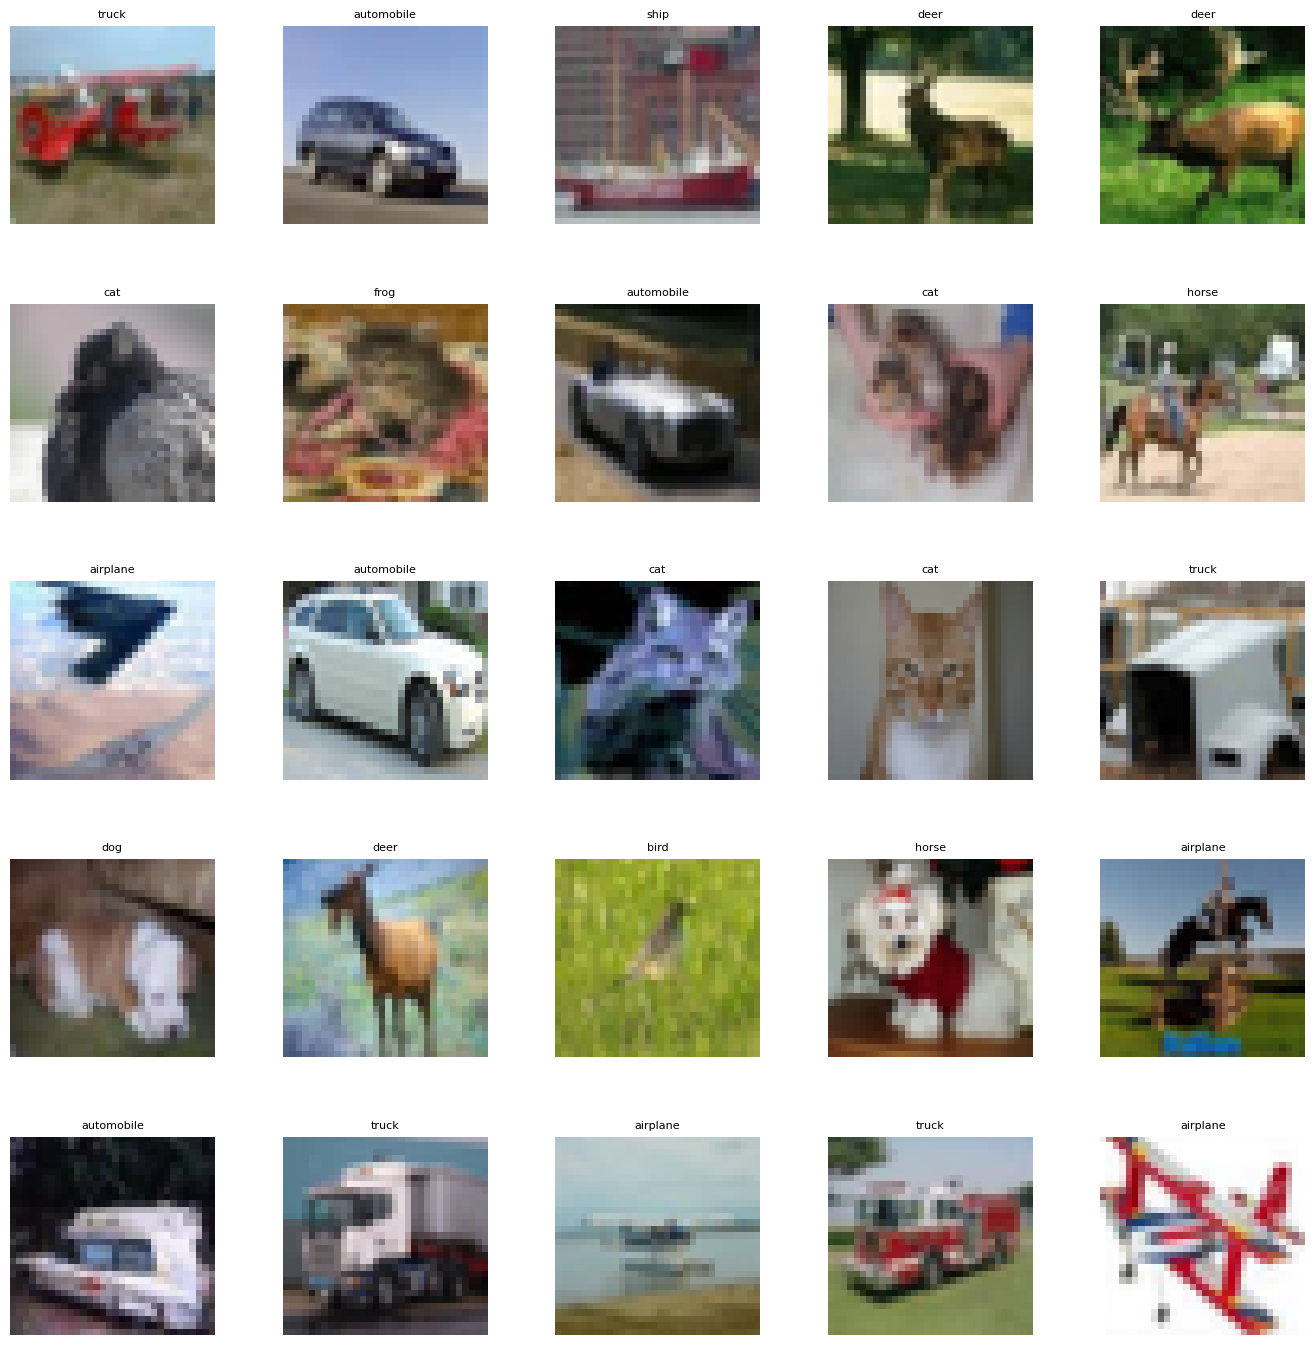

In [14]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
axes[i].imshow(X_test[index,1:])
label_index = int(y_pred[index])
axes[i].set_title(labels[label_index], fontsize = 8)
axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.90      0.96      0.93      1000
           2       0.87      0.74      0.80      1000
           3       0.80      0.66      0.72      1000
           4       0.80      0.89      0.84      1000
           5       0.88      0.67      0.76      1000
           6       0.78      0.95      0.86      1000
           7       0.86      0.93      0.89      1000
           8       0.91      0.90      0.91      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8453 - loss: 0.4697 - precision: 0.8846 - recall: 0.8130
Test Accuracy : 84.83%
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


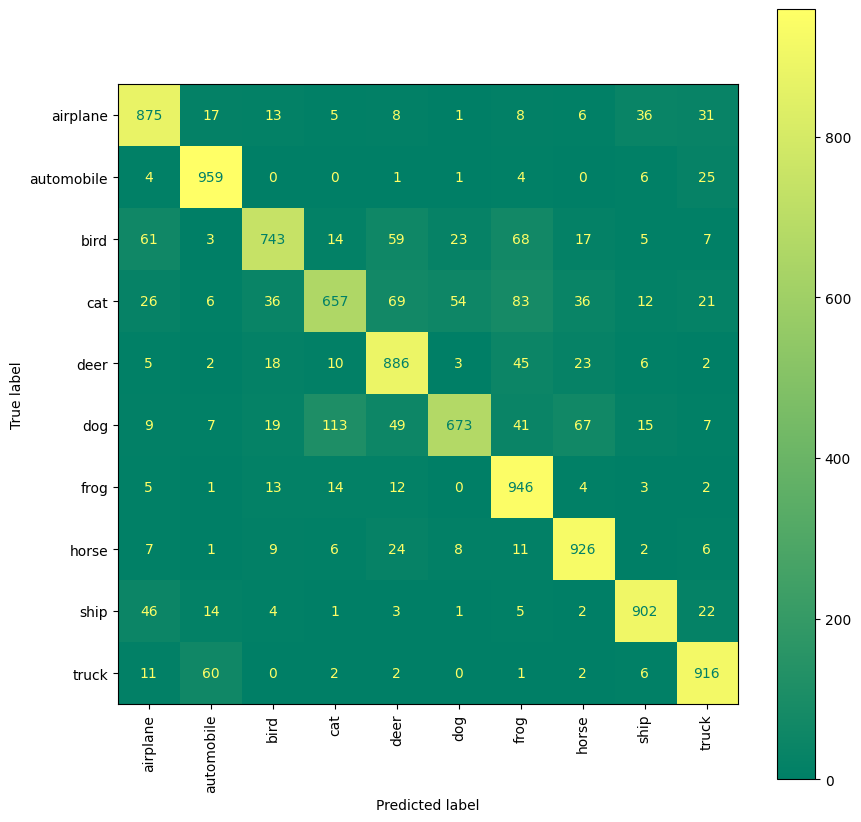

In [16]:
from sklearn.metrics import confusion_matrix


evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()